### Predicting the Mayor of London 2016 results using ward level demographics

In this notebook several classification algorithms such as Logistic regression, Support Vector Machine, K Nearest Neighbor(KNN) and 
Decision Tree. The dataset included as **outcome** the results of **Mayor of London election in 2016** and as features (predictors/independent variables) some selected socio-demographic predictors agregated at ward level.  
The previously used the demographic dataset in another notebooks: 

**__[Predicting the median house price in London Wards](https://github.com/sebastianBIanalytics/Data_Science_Machine_Learning_Python/blob/master/Predicting%20median%20House%20Price%20London%20-%20Multiple%20Regression.ipynb)__**

**__[Where in London to open a new Luxury Wine Bar](https://github.com/sebastianBIanalytics/Data_Science_Machine_Learning_Python/blob/master/WINE%20BAR%20in%20London%20Final.ipynb)__**

The original source of the predictors can be accessed at the link below:  
** Ward Profiles and Atlas of Greater London Authority (GLA)** provided by **__[DataStore London](https://data.london.gov.uk/dataset/ward-profiles-and-atlas)__**. Although the provided details reflect London profile until 2015, this is the most comprehensive dataset publicly available that cover data from the 2011 Census, from ONS and governmental data. 

The election results used the **__[London Elections Results 2016, Wards, Boroughs, Constituency]( https://data.london.gov.uk/download/london-elections-results-2016-wards-boroughs-constituency/01f4ff3a-c562-4d61-977f-c2dfb36694ce/gla-elections-votes-all-2016.xlsx)__**. However, only the voted per ward level were included while the postal votes (given at Borough level) were excluded. 



The necessary packages were imported. 

In [1]:
import sys
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import matplotlib.ticker as ticker
import pylab as pl
import pandas.testing as tm
import pandas.util.testing as tm
import seaborn as sns

## setting the working directory
import os


from matplotlib.ticker import NullFormatter
from sklearn.metrics import roc_curve, auc
from sklearn import preprocessing
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

### Model Evaluation using Test set 
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss


C:\Users\nastu\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: ...working... done

# All requested packages already installed.



## Importing the dataset

In [3]:
## setting directory 
os.chdir("C://@@ Default Folder Python Notebooks/Data")

## Importing the dataset 
Election = pd.read_csv('Election_London 2016 Cleaned dataset.csv', encoding='ANSI')
Election.head()

,ID,Borough,Ward,Constituency,Turnout,Ward Level Electorate,Winner,Sadiq Aman Khan,% Children aged 0-15,% Working-age 16-64,...,% dependent children in out-of-work households 2014,% Households No adults Employment dependent children 2011,% Lone parents no employment 2011,Average GCSE capped point scores 2014,% No qualifications 2011,% Level 4 and above qualifications 2011,Crime rate 2014_15,% area that is open space - 2014,Average Public Transport Accessibility score 2014,Turnout at Mayoral election 2012
0,1,Bexley,Barnehurst,Bexley & Bromley,"2,758","6,886",Zac Goldsmith,588,18.668678,62.049783,...,11.020408,3.330971,38.013699,326.298246,23.1,20.1,46.461219,35.978052,3.135916,35.067040
1,2,Bexley,Belvedere,Bexley & Bromley,"2,675","7,506",Zac Goldsmith,957,23.174859,63.908139,...,21.571429,6.147795,42.576029,306.139264,23.7,21.9,61.963541,33.133207,2.752564,31.933791
2,3,Bexley,Blackfen And Lamorbey,Bexley & Bromley,"3,011","6,974",Zac Goldsmith,613,18.347339,62.595705,...,7.200000,1.996152,26.720648,332.838519,22.4,19.3,28.756957,9.484078,2.051587,35.887557
3,4,Bexley,Blendon And Penhill,Bexley & Bromley,"3,050","6,993",Zac Goldsmith,546,17.973648,62.571558,...,5.686275,2.199101,28.358209,340.145185,21.5,19.6,37.669377,13.770616,2.065738,38.663117
4,5,Bexley,Brampton,Bexley & Bromley,"3,311","6,902",Zac Goldsmith,707,16.559789,60.109393,...,5.555556,1.946647,34.090909,325.361682,22.9,20.7,26.340457,9.101077,2.665179,41.213064


In [4]:
Election['Winner'].value_counts()

Sadiq Aman Khan    379
Zac Goldsmith      242
Name: Winner, dtype: int64

The winner in 379 wards was Sadiq Aman Khan, the actual Mayor of London. Below, in Table 1, it can be observed in which Boroughs of London he won all the wards and where he lost.  

In [5]:
### NAs were dropped from dataset

Election.dropna(inplace=True)

In [6]:
Election.columns

Index(['ID', 'Borough', 'Ward', 'Constituency', 'Turnout',
       'Ward Level Electorate', 'Winner', 'Sadiq Aman Khan',
       '% Children aged 0-15', '% Working-age 16-64',
       '% Older people aged 65+', 'Median Age 2013', 'Population density 2013',
       '% BAME 2011', '% Not Born in UK 2011', 'General Fertility Rate 2013',
       'Male life expectancy 2009_13', 'Female life expectancy 2009-13 ',
       '% children in reception obese 2011_14',
       '% children year 6 obese- 2011_14',
       'Rate Ambulance Incidents per 1,000 population - 2014',
       'In employment (16-64) 2011', 'Number of jobs in area - 2013',
       'Rate new migrant workers - 2011/12', 'No properties sold 2014',
       'Median Household income 2012/13', '% semi-detached houses 2011',
       '% Households Private Rented 2011', '% dwellings CT bands A or B 2015',
       '% dwellings CT bands F, G or H - 2015',
       'Rate Claimant Housing Benefit 2015', 'Rate JobSeekers Allowance 2015',
       '% dependent

### Bivariate analysis of possible associations between outcome and selected features

Before proceeding to data analysis using logistic regression, SVM, KNN cluster and decision tree data were analysed visually using plot to represent some associations. 

In [7]:
Vote_Borough_prop = pd.crosstab(Election['Borough'], Election['Winner'], 
                           margins=True, normalize='index').sort_values('Sadiq Aman Khan', 
                           ascending=False).round(4)*100
Vote_Borough_prop

Winner,Sadiq Aman Khan,Zac Goldsmith
Borough,,
Barking & Dagenham,100.00,0.00
Islington,100.00,0.00
Tower Hamlets,100.00,0.00
Camden,100.00,0.00
Southwark,100.00,0.00
Newham,100.00,0.00
Hackney,100.00,0.00
Lewisham,100.00,0.00
Haringey,100.00,0.00


Table 1. Association Table - Percentage of wards in which a candidate was elected per borough.

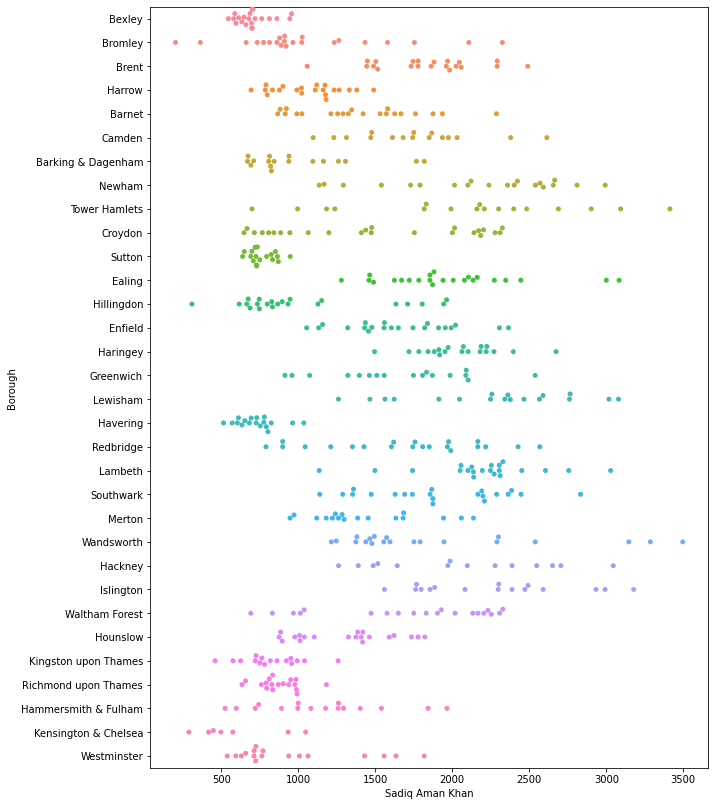

In [9]:
plt.figure(figsize=(10, 14))
sns.swarmplot(x ='Sadiq Aman Khan', y='Borough', data=Election)
# Show plot
plt.show()

Some useless variables were excluded and the cases which contain NA were excluded. The final dataset contains 600 wards and 13 variables which included only significant predictors of the outcome.  

In [13]:
 Features = Election[['Sadiq Aman Khan','% Children aged 0-15', 
        'Median Age 2013', 'In employment (16-64) 2011', 'Number of jobs in area - 2013', 
        'No properties sold 2014', '% Households Private Rented 2011', 
        '% dependent children in out-of-work households 2014', 
        '% dwellings CT bands F, G or H - 2015', 'Crime rate 2014_15', 'Turnout at Mayoral election 2012']] 
      

In [14]:
Features.shape

(600, 11)

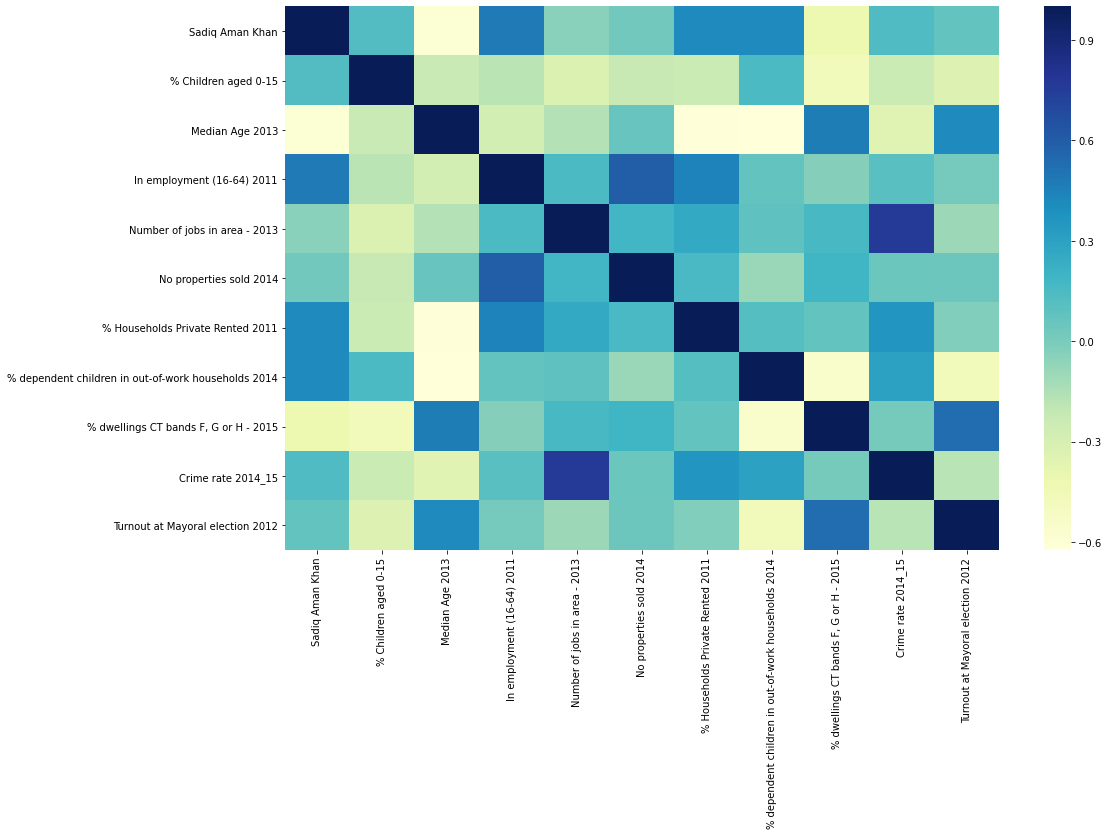

In [15]:
plt.figure(figsize = (16,10))
sns.heatmap(Features.corr(),annot = False, cmap="YlGnBu")

C:\Users\nastu\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


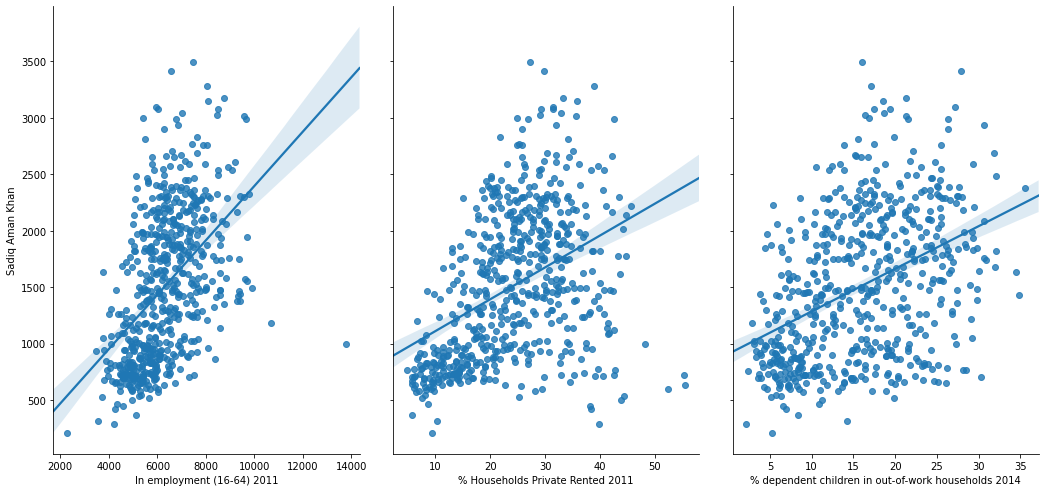

In [18]:
# Visualise the relationship between the features and the response using scatterplots
sns.pairplot(Features, x_vars=['In employment (16-64) 2011', '% Households Private Rented 2011', 
        '% dependent children in out-of-work households 2014'], 
             y_vars = 'Sadiq Aman Khan',size=7, aspect=0.7, kind='reg')

C:\Users\nastu\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


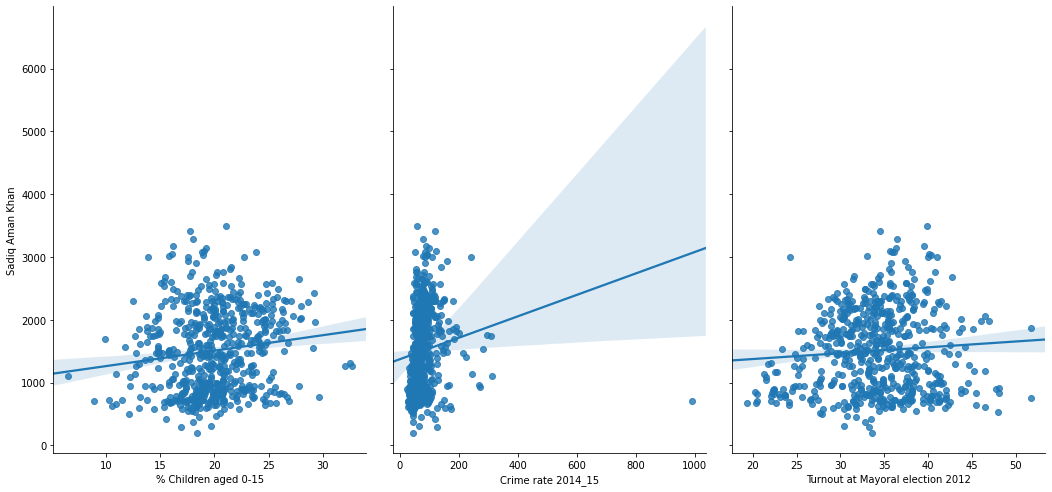

In [19]:
# Visualise the relationship between the features and the response using scatterplots
sns.pairplot(Features, x_vars=['% Children aged 0-15', 'Crime rate 2014_15', 'Turnout at Mayoral election 2012'], 
             y_vars = 'Sadiq Aman Khan',size=7, aspect=0.7, kind='reg')

However, only 11 variables (**listed below**) were kept for analysis. Most of then have integers or float format.

In [20]:
Features.dtypes

Sadiq Aman Khan                                          int64
% Children aged 0-15                                   float64
Median Age 2013                                          int64
In employment (16-64) 2011                               int64
Number of jobs in area - 2013                          float64
No properties sold 2014                                  int64
% Households Private Rented 2011                       float64
% dependent children in out-of-work households 2014    float64
% dwellings CT bands F, G or H - 2015                  float64
Crime rate 2014_15                                     float64
Turnout at Mayoral election 2012                       float64
dtype: object

### Feature selection

Lets defind feature sets, X:

In [21]:
X = Features
X[0:5]

,Sadiq Aman Khan,% Children aged 0-15,Median Age 2013,In employment (16-64) 2011,Number of jobs in area - 2013,No properties sold 2014,% Households Private Rented 2011,% dependent children in out-of-work households 2014,"% dwellings CT bands F, G or H - 2015",Crime rate 2014_15,Turnout at Mayoral election 2012
0,588,18.668678,41,4958,2200.0,228,8.3,11.020408,4.494382,46.461219,35.067040
1,957,23.174859,35,5439,3800.0,246,18.6,21.571429,1.351351,61.963541,31.933791
2,613,18.347339,42,5157,1100.0,182,8.1,7.200000,5.854801,28.756957,35.887557
3,546,17.973648,41,5336,1500.0,208,8.1,5.686275,13.501144,37.669377,38.663117
4,707,16.559789,45,4995,1700.0,146,5.7,5.555556,6.888361,26.340457,41.213064


In [22]:
y = Election['Winner'].values
y [0:5]

array(['Zac Goldsmith', 'Zac Goldsmith', 'Zac Goldsmith', 'Zac Goldsmith',
       'Zac Goldsmith'], dtype=object)

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [23]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.40028719, -0.35322001,  1.65937172, -1.02587352, -0.32306534,
         0.45642946, -1.6227474 , -0.66398467, -0.61420056, -0.60514416,
         0.16730063],
       [-0.83776776,  0.88409238,  0.1428096 , -0.65990044, -0.20128314,
         0.66952063, -0.55953069,  0.78144715, -0.81948879, -0.31771915,
        -0.42009309],
       [-1.36217612, -0.44145369,  1.91213207, -0.87446262, -0.40679061,
        -0.08813688, -1.64339238, -1.1873596 , -0.52534429, -0.93339484,
         0.3211239 ],
       [-1.46431379, -0.54406209,  1.65937172, -0.7382689 , -0.37634506,
         0.21966149, -1.64339238, -1.39473167, -0.02592051, -0.7681517 ,
         0.84146115],
       [-1.21887849, -0.9322813 ,  2.67041313, -0.99772175, -0.36112228,
        -0.51431923, -1.8911322 , -1.41263945, -0.45783692, -0.97819861,
         1.31950261]])

The features were names as **X** and target as **y**. The Train and Test datasets were created as a 80% and 20% of dataset. 

# Train/Test dataset

Okay, we split our dataset into train and test set:


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (480, 11) (480,)
Test set: (120, 11) (120,)


# Logistic Regression

The first classification methods applied is Logistic Regression. With an F1 score of 0.925 and Jaccard index for accuracy of 0.925 and Log Loss of 0.258 the model Logistic regression is a good option to correctly classify which candidate will be selected on each wards based on the selected demographic variables.


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_similarity_score


## Initialize Logistic Regression instance
LR = LogisticRegression()

## Fit the model on the training data ### model is trained

LR = LogisticRegression(penalty='l1', C=0.01, solver='liblinear').fit(X_train, y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
## Predicting outcome for training and test dataset 

pred_train_Y = LR.predict(X_train)

pred_test_Y = LR.predict(X_test)

pred_test_Y_prob = LR.predict_proba(X_test)

#pred_test_Y_prob = LR.predict_proba(X_test)[:,1]

In [27]:
pred_test_Y_prob

array([[0.3959822 , 0.6040178 ],
       [0.65281859, 0.34718141],
       [0.5535145 , 0.4464855 ],
       [0.71496542, 0.28503458],
       [0.24030935, 0.75969065],
       [0.33097683, 0.66902317],
       [0.45493484, 0.54506516],
       [0.31390651, 0.68609349],
       [0.51412234, 0.48587766],
       [0.66830722, 0.33169278],
       [0.56684826, 0.43315174],
       [0.64061566, 0.35938434],
       [0.73146858, 0.26853142],
       [0.40408198, 0.59591802],
       [0.49920159, 0.50079841],
       [0.664794  , 0.335206  ],
       [0.64518072, 0.35481928],
       [0.40183426, 0.59816574],
       [0.43539001, 0.56460999],
       [0.42534756, 0.57465244],
       [0.49944543, 0.50055457],
       [0.62444829, 0.37555171],
       [0.34787473, 0.65212527],
       [0.57972251, 0.42027749],
       [0.74920654, 0.25079346],
       [0.33126914, 0.66873086],
       [0.69328191, 0.30671809],
       [0.6458801 , 0.3541199 ],
       [0.585834  , 0.414166  ],
       [0.37318635, 0.62681365],
       [0.

In [28]:
LR_train_acc = round(accuracy_score(y_train, pred_train_Y),4)
LR_test_acc = round(accuracy_score(y_test, pred_test_Y), 4)

In [29]:
### f1_score from sklearn library

from sklearn.metrics import f1_score
F1_LR = round (f1_score(y_test, pred_test_Y, average='weighted'), 4) 

In [30]:
 ### Jaccard index for accuracy:
from sklearn.metrics import jaccard_similarity_score
Jaccard_LR = round (jaccard_similarity_score(y_test, pred_test_Y), 4)

C:\Users\nastu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


In [31]:
from sklearn.metrics import log_loss
log_loss(y_test, pred_test_Y_prob)

0.5037637761704017

In [32]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix = confusion_matrix(y_test,pred_test_Y)  
confusion_matrix

print(classification_report(y_test,pred_test_Y))

                 precision    recall  f1-score   support

Sadiq Aman Khan       0.96      0.80      0.87        65
  Zac Goldsmith       0.80      0.96      0.88        55

       accuracy                           0.88       120
      macro avg       0.88      0.88      0.87       120
   weighted avg       0.89      0.88      0.87       120



In [33]:
print (confusion_matrix)

[[52 13]
 [ 2 53]]



 True positive is 52.
    
 True negative is 53.

 False positive is 13.
    
 False negative is 2.


# K Nearest Neighbor(KNN)

The second classification method applied will be KNN clustering with 2, 4, 6 clusters. Based on the accuracy for the training and test datasets the 4 clusters solution is preferable. 

In [34]:
from sklearn.neighbors import KNeighborsClassifier


In [35]:
#Train Model and Predict 

k = 3
neigh3 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh3
yhat3 = neigh3.predict(X_test)  
yhat3[0:5]

# Accuracy evaluation

print ("Train set Accuracy KNN3: ", metrics.accuracy_score(y_train, neigh3.predict(X_train)))
print("Test set Accuracy KNN3: ", metrics.accuracy_score(y_test, yhat3))

Train set Accuracy KNN3:  0.9541666666666667
Test set Accuracy KNN3:  0.9333333333333333


In [36]:
k = 4
neigh4 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh4
yhat4 = neigh4.predict(X_test)  
yhat4[0:5]

# Accuracy evaluation

print("Train set Accuracy KNN4: ", metrics.accuracy_score(y_train, neigh4.predict(X_train)))
print("Test set Accuracy KNN4: ", metrics.accuracy_score(y_test, yhat4))

Train set Accuracy KNN4:  0.94375
Test set Accuracy KNN4:  0.9166666666666666


In [37]:
k = 6
neigh6 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh6
yhat6 = neigh6.predict(X_test)  
yhat6[0:5]

# Accuracy evaluation

print("Train set Accuracy KNN6: ", metrics.accuracy_score(y_train, neigh6.predict(X_train)))
print("Test set Accuracy KNN6: ", metrics.accuracy_score(y_test, yhat6))

Train set Accuracy KNN6:  0.9458333333333333
Test set Accuracy KNN6:  0.9166666666666666


In [38]:
### I choose KNN 3 as the Accuracy for both Train and Test data are the highest. 
### f1_score from sklearn library

KNN3_F1 = round (f1_score(y_test, yhat3, average='weighted'),4) 

KNN3_jaccard = round (jaccard_similarity_score(y_test, yhat3), 4)

KNN3_train_acc = round (metrics.accuracy_score(y_train, neigh3.predict(X_train)), 4)

KNN3_test_acc = round (metrics.accuracy_score(y_test, yhat3), 4)

C:\Users\nastu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


In [39]:
pred_prob_KNN = neigh3.predict_proba(X_test)

# Decision Tree

The third classification method applied will be the **Decision Tree**, at depth level 10.  


In [41]:
## I tried different maximum detphs and 10 is the best one

Vote_Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 10)

Vote_Tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [42]:
predTreeTrain = Vote_Tree.predict(X_train) 

In [43]:
predTree = Vote_Tree.predict(X_test) 

In [44]:
DT_train_acc = round ( metrics.accuracy_score(y_train, predTreeTrain), 4) 
DT_test_acc = round ( metrics.accuracy_score(y_test, predTree), 4) 
DT_jaccard = round (jaccard_similarity_score(y_test, predTree), 4) 
DT_F1 = round (f1_score(y_test, predTree, average='weighted'), 4) 

C:\Users\nastu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


# Support Vector Machine

Finally, the SVM is applied to classify the Winner of Mayoral election in London. 

In [45]:
from sklearn import svm

clf1 = svm.SVC(kernel='rbf')
clf1.fit(X_train, y_train) 

C:\Users\nastu\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [46]:
yhatSVM = clf1.predict(X_test)

In [47]:
# write your code here
clf1 = svm.SVC(kernel='linear')
clf1.fit(X_train, y_train) 
yhatSVM = clf1.predict(X_test)

SVM_F1 = round (f1_score(y_test, yhatSVM, average='weighted'), 4) 

SVM_Jaccard = round (jaccard_similarity_score(y_test, yhatSVM), 4) 
SVM_test_acc = round(metrics.accuracy_score(y_test, yhatSVM), 4)



C:\Users\nastu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


In [48]:
print("1. F1 score for Logistic Regression: ", F1_LR) 
print("2. Jaccard Similarity Score for Logistic Regression: ", Jaccard_LR)
print("3. Train set Accuracy for Logistic Regression: ", LR_train_acc)
print("4. Test set Accuracy for Logistic Regression: ", LR_test_acc)

#####

print("1. F1 score for Decision Tree: ", DT_F1)
print("2. Jaccard Similarity Score for Decision Tree: ", DT_jaccard)
print("3. Decision Tree's Training Accuracy: ", DT_train_acc) 
print("4. Decision Tree's Test Accuracy: ", DT_test_acc) 

#####

print("1. F1 score for SVM: ", SVM_F1)
print("2. Jaccard Similarity Score for SVM: ", SVM_Jaccard)
print("4. Test set Accuracy for SVM: ", SVM_test_acc)


print("1. F1 score for KNN 3 is: ", KNN3_F1)
print("2. Jaccard Similarity Score for KNN 3 is: ", KNN3_jaccard)
print("3. Train set Accuracy for KNN 3 is: ", KNN3_train_acc)
print("4. Test set Accuracy for KNN 3 is: ", KNN3_test_acc)

1. F1 score for Logistic Regression:  0.8749
2. Jaccard Similarity Score for Logistic Regression:  0.875
3. Train set Accuracy for Logistic Regression:  0.8583
4. Test set Accuracy for Logistic Regression:  0.875
1. F1 score for Decision Tree:  0.8911
2. Jaccard Similarity Score for Decision Tree:  0.8917
3. Decision Tree's Training Accuracy:  1.0
4. Decision Tree's Test Accuracy:  0.8917
1. F1 score for SVM:  0.9163
2. Jaccard Similarity Score for SVM:  0.9167
4. Test set Accuracy for SVM:  0.9167
1. F1 score for KNN 3 is:  0.9332
2. Jaccard Similarity Score for KNN 3 is:  0.9333
3. Train set Accuracy for KNN 3 is:  0.9542
4. Test set Accuracy for KNN 3 is:  0.9333


# Report
The metrics from different classification methods were included in the table below to compare the methods and decide which is the best classification method.


| Algorithm          | Jaccard | F1-score | Train Acc | Test Acc  |
|--------------------|---------|----------|-----------|-----------| 
| KNN-3              | 0.933   | 0.933    | 0.954     |  0.933    |
| Decision Tree (10) | 0.892   | 0.891    | 1.000     |  0.900    |
| SVM                | 0.917   | 0.916    |           |  0.917    |
| Logistic Regression| 0.875   | 0.875    | 0.856     |  0.875    |

The scores listed above were printed in the cells below. Based on them we can conclude the SVM seems to be the best performing classification method using the list of selected predictors. 

This notebook is the 3nd draft of my way of showing how Machine learning can be potentially used to create a model for predicting the results of 
London 2016 election based on selected my selection of variables (14 out of ~72). 
This selection takes into account statistical checking of the relation between variables 
(multicolinearity) and also assessed that all included features (variables) are statistically significant.   

* 'Sadiq Aman Khan',
* '% Children aged 0-15', 
* 'Median Age - 2013', 
* 'Median Age 2013', 
* 'In employment (16-64) 2011', 
* 'Number of jobs in area - 2013', 
* 'No properties sold 2014', 
* '% Households Private Rented 2011', 
* '% dependent children in out-of-work households 2014', 
* '% dwellings CT bands F, G or H - 2015', 
* 'Crime rate 2014_15', 
* 'Turnout at Mayoral election 2012'
         

* If you read this Notebook please email me any comments or suggestions to my email sebastian@bianalytics.org